In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Q1: bmi dataset

In [7]:
bmi_df = pd.read_csv('bmi_region.csv')
bmi_df.head()

,Region,bmi
0,Andhra Pradesh,20
1,Andhra Pradesh,20
2,Andhra Pradesh,24
3,Andhra Pradesh,25
4,Andhra Pradesh,26


In [60]:
bmi_df.shape

(17500, 2)

In [17]:
bmi_df.describe()

,bmi
count,17500.000000
mean,22.482229
std,2.877437
min,18.000000
25%,20.000000
50%,22.000000
75%,25.000000
max,27.000000


In [71]:
bmi_df.groupby(['Region']).bmi.median().sort_values(ascending = False)

Region
West Bengal          23.0
Manipur              23.0
Andhra Pradesh       23.0
Arunachal Pradesh    23.0
Chandigarh           23.0
Daman & Diu          23.0
Gujarat              23.0
Haryana              23.0
Himachal Pradesh     23.0
Jharkhand            23.0
Maharashtra          23.0
A & N Islands        23.0
Punjab               23.0
Bihar                22.5
Kerala               22.5
Rajasthan            22.0
Uttar Pradesh        22.0
Tripura              22.0
Assam                22.0
Tamil Nadu           22.0
Chhattisgarh         22.0
D & N Haveli         22.0
Sikkim               22.0
Goa                  22.0
Mizoram              22.0
Meghalaya            22.0
Puducherry           22.0
Jammu & Kashmir      22.0
Odisha               22.0
Karnataka            22.0
Uttarakhand          22.0
Madhya Pradesh       22.0
Nagaland             22.0
NCT of Delhi         22.0
Lakshadweep          22.0
Name: bmi, dtype: float64

## The top states 5 w.r.t to bmi when we are considering median are: 
- West bengal 
- Manipur, 
- Andhra Prades'h, 
- Arunachal Pradesh and 
- Chandigarg

In [70]:
bmi_df.groupby(['Region']).bmi.mean().sort_values(ascending = False)

Region
Haryana              22.796
Andhra Pradesh       22.708
Arunachal Pradesh    22.708
Gujarat              22.700
Manipur              22.690
Himachal Pradesh     22.664
Punjab               22.656
West Bengal          22.596
Maharashtra          22.580
Daman & Diu          22.572
Chandigarh           22.536
Kerala               22.528
A & N Islands        22.522
Meghalaya            22.516
Jammu & Kashmir      22.512
Bihar                22.486
Sikkim               22.480
Tripura              22.456
Lakshadweep          22.446
Goa                  22.430
Mizoram              22.424
Puducherry           22.416
D & N Haveli         22.416
Karnataka            22.414
Uttarakhand          22.412
Uttar Pradesh        22.398
Jharkhand            22.386
Nagaland             22.386
Madhya Pradesh       22.366
Odisha               22.316
Tamil Nadu           22.314
NCT of Delhi         22.298
Assam                22.286
Rajasthan            22.276
Chhattisgarh         22.188
Name: bmi, dt

## The top states 5 w.r.t to bmi when we are considering mean are: 
- Haryana 
- Andhra Pradesh, 
- Arunachal Pradesh, 
- Gujarat and 
- Manipur

In [16]:
Q1 = bmi_df.quantile(0.25)
Q3 = bmi_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

bmi    5.0
dtype: float64


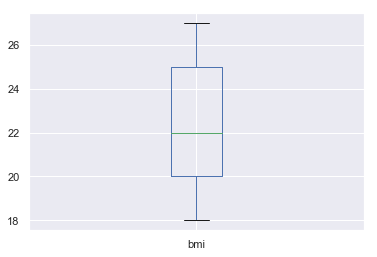

In [36]:
boxplot = bmi_df.boxplot(column=['bmi'])

## As seen from the above boxplot there are no outliers

In [47]:
bmi = np.array(bmi_df.bmi)

In [48]:
bmi

array([20, 20, 24, ..., 27, 20, 23], dtype=int64)

In [49]:
 from scipy import stats

In [51]:
bmi_z = stats.zscore(bmi)

In [58]:
count = 0
for i in bmi_z:
    if (i < -3) | (i > 3):
        count = count + 1
        

In [56]:
print(count)

0


In [208]:
skew(bmi_z)

0.015636888200003207

## No outiers.

''

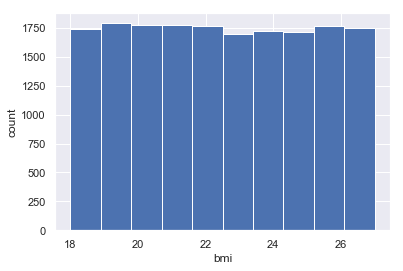

In [59]:
plt.hist(bmi)
plt.xlabel('bmi')
plt.ylabel('count')
;

In [179]:
from scipy.stats import skew

In [66]:
skew(bmi_z)

0.015636888200003207

## The data is very less skewed but the distribution doesnt folow a normal distribution.

# Q2: Boston Dataset

In [73]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data.data.shape)
print(type(boston_data))
df_boston   =   pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target']    =   pd.Series(boston_data.target)


(506, 13)
<class 'sklearn.utils.Bunch'>


In [75]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [77]:
df_boston.shape

(506, 14)

In [78]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


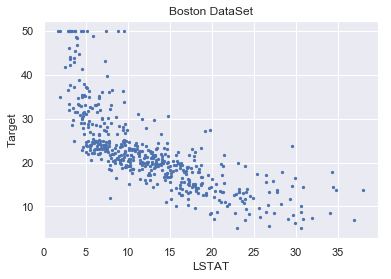

In [81]:
sns.set()
plt.scatter(x=df_boston['LSTAT'],y=df_boston.target,data=df_boston,
            s=20,marker='.')
plt.xlabel('LSTAT')
plt.ylabel('Target')
plt.title('Boston DataSet')
plt.show()

In [85]:
np.corrcoef([df_boston.LSTAT, df_boston.target])

array([[ 1.        , -0.73766273],
       [-0.73766273,  1.        ]])

In [83]:
df_boston['LSTAT'].corr(df_boston['target'])

-0.7376627261740148

- From the above scatter plot, we can say the variable is negatively correlated with the target variable and also the corelation looks pretty strong.
- It is also evident from corr() that yes indeed the corelation is strong and the value is -0.737
- This mean the change in one variable(say LSTAT0 causes the change in target in other direction
- Whereever we have a lower status population there the hosing prices is pretty high since a major population corresponds to higher status and when we have a higher percentage of people belonging to lower status, then the price is pretty low.

# Q3: IRIS Dataset

In [87]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(iris.target_names)
print(iris.feature_names)
df_iris = pd.DataFrame(iris.data,columns = iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [88]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Summary Statistics

In [130]:
summary = df_iris.describe()

In [131]:
summary

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## As seen from the above matrix:
- We can say that not all the features(columns) are very less skewed. Only sepal length and sepal width is less skewed since mean and median are almost same(seen in below graphs).
- Also, we can see that all the values for every different quantiles ranges are increasing gradually indicating there are very less outliers

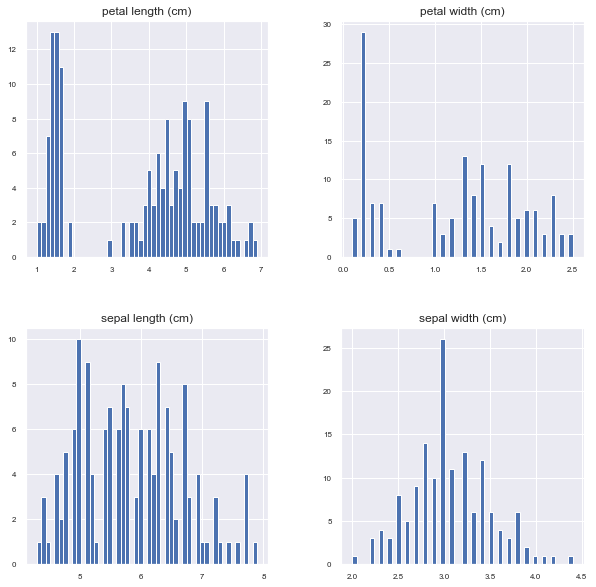

In [93]:
df_iris.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8);

## BoxPlot

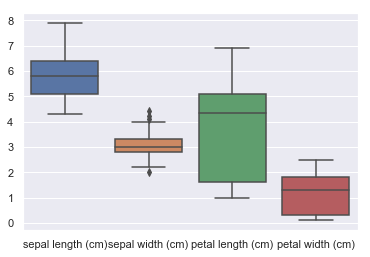

In [124]:
sns.set()
sns.boxplot(data=df_iris)

# Label the axes



# Show the plot
plt.show();

In [132]:
summary

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Sepal length

In [145]:
sepal_length = summary.iloc[:,:1]

In [146]:
## Sepal length(cm):
med_max = sepal_length.iloc[7,:] - sepal_length.iloc[5,:]
print(med_max)

sepal length (cm)    2.1
dtype: float64


In [147]:
med_min = sepal_length.iloc[5,:] - sepal_length.iloc[3,:]
print(med_min)

sepal length (cm)    1.5
dtype: float64


## Sepal width

In [151]:
sepal_width = summary.iloc[:,[1]]
sepal_width

,sepal width (cm)
count,150.000000
mean,3.057333
std,0.435866
min,2.000000
25%,2.800000
50%,3.000000
75%,3.300000
max,4.400000


In [153]:
med_max = sepal_width.iloc[7,:] - sepal_width.iloc[5,:]
print(med_max)

sepal width (cm)    1.4
dtype: float64


In [152]:
med_min = sepal_width.iloc[5,:] - sepal_width.iloc[3,:]
print(med_min)

sepal width (cm)    1.0
dtype: float64


## Petal length

In [154]:
petal_length = summary.iloc[:,[2]]
petal_length

,petal length (cm)
count,150.000000
mean,3.758000
std,1.765298
min,1.000000
25%,1.600000
50%,4.350000
75%,5.100000
max,6.900000


In [155]:
med_max = petal_length.iloc[7,:] - petal_length.iloc[5,:]
print(med_max)

petal length (cm)    2.55
dtype: float64


In [156]:
med_min = petal_length.iloc[5,:] - petal_length.iloc[3,:]
print(med_min)

petal length (cm)    3.35
dtype: float64


## Petal width

In [157]:
petal_width = summary.iloc[:,[3]]
petal_width

,petal width (cm)
count,150.000000
mean,1.199333
std,0.762238
min,0.100000
25%,0.300000
50%,1.300000
75%,1.800000
max,2.500000


In [158]:
med_max = petal_width.iloc[7,:] - petal_width.iloc[5,:]
print(med_max)

petal width (cm)    1.2
dtype: float64


In [159]:
med_min = petal_width.iloc[5,:] - petal_width.iloc[3,:]
print(med_min)

petal width (cm)    1.2
dtype: float64


## Boxplot:
- We have few outliers in sepal width(cm) feature of the dataset
- There is much variance seen in petal length attribute since the box width is very wide and there are many values which are clustered towards left side.
- The box width is very less wide for sepal width and also there are outliers in this feature indicating there are some flowers which have exceptionally high sepal width and there is one flower which has very less sepal width.
- Sepal length has the highest values amongst all other features with the lowest being petal width.

## Skewness:
- Sepal Length attribute follows a close-to-normal distribution( not much skewed ) and based on the distance we see that the whole box is projected towards the min values since the distance between minimum value(lower edge) and the median is less compared to that of median and maximum value.
- Sepal Width is Right Skewed (with some outliers) and the box is slightly pushed towards the minimum values(lower edge in boxplot).
- Petal Length is Left Skewed 
- Petal Width is left Skewed

# Q4: Bayes theorem Probability question

- L - Having liver disease
- T - Test result
- NL - Not having liver disease

## Given : P(L) = 0.04, P(T/L) = 0.95, P(T/NL) = 0.90
## To find out: P(T/L) = ?

## Bayes Formula : P(L/T) = [P(L) x P(T/L)] / P(T)


## Based on the above data, we can write:
- **P(NL) : 0.96**
- **P(T) : [P(L)* P(T/L)] + [P(NL)* P(T/NL)]** which is nothing but probability of getting positive test

In [161]:
val = [0.04*0.95] + [0.96*0.90]

In [162]:
val

[0.038, 0.864]

In [166]:
probability_of_positive_test = sum(val)
print(probability_of_positive_test)

0.902


In [168]:
prob_1 = (0.04*0.95)
print(prob_1)

0.038


In [170]:
required_probability = prob_1 / probability_of_positive_test
print(required_probability)

0.04212860310421286


## So P(L/T) = 0.04212

# Q6:

In [171]:
marks_dict  =  {'before':[86, 86, 75, 85, 87, 95, 85, 75, 84, 73, 84, 97, 84, 75,
                       73, 89, 80, 81, 82, 76],
                   'after' : [97, 95, 87, 95, 76, 99, 86, 88, 82, 74, 80, 95, 90, 77,
                      75, 76, 75, 80, 84, 75]}
marks_df   =  pd.DataFrame(marks_dict)
print(marks_df)

    before  after
0       86     97
1       86     95
2       75     87
3       85     95
4       87     76
5       95     99
6       85     86
7       75     88
8       84     82
9       73     74
10      84     80
11      97     95
12      84     90
13      75     77
14      73     75
15      89     76
16      80     75
17      81     80
18      82     84
19      76     75


## Ans(a):
- **H(null) : mean(before) = mean(after)**
- **H(alternate) : mean(before) < mean(after)**

In [172]:
from scipy import stats

In [173]:
stats.ttest_rel(marks_df['before'], marks_df['after'])

Ttest_relResult(statistic=-1.067227865230483, pvalue=0.2992424126910259)

## We are doing a paired sample t test:

## Ans(b): Since p-value(0.299) is not less than 0.05, we fail to reject the null Hypothesis.
## Ans(c): At 5% significance level, we fail to reject null hypothesis. Hence after taking the coaching, the marks are not improved.

In [175]:
marks_df['Marks_Difference'] = marks_df.before - marks_df.after

In [176]:
marks_df

,before,after,Marks_Difference
0,86,97,-11
1,86,95,-9
2,75,87,-12
3,85,95,-10
4,87,76,11
5,95,99,-4
6,85,86,-1
7,75,88,-13
8,84,82,2
9,73,74,-1


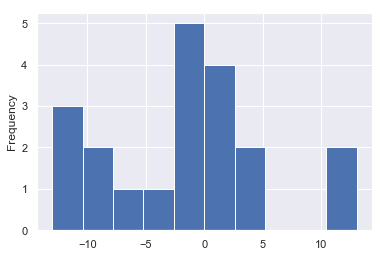

In [177]:
marks_df['Marks_Difference'].plot(kind = 'hist')

In [178]:
skew(marks_df['Marks_Difference'])

0.21803286654626003

## Q7: Given: p = 0.2, q = 0.8, n = 10(number of trails)

- **Formula : P(x) = (nCx) (p)^^n (q)^^n-x**
- **P(x = 10) = 10C10 (0.2)^^10 (0.8)^^0 = 0.0000001024**

## Q8:

In [194]:
body_wt = pd.read_csv('BodyWeight.csv')
body_wt.head()

,Unnamed: 0,weight,group
0,1,125.1,ctrl
1,2,167.4,ctrl
2,3,155.4,ctrl
3,4,183.3,ctrl
4,5,135.0,ctrl


In [195]:
body_wt

,Unnamed: 0,weight,group
0,1,125.1,ctrl
1,2,167.4,ctrl
2,3,155.4,ctrl
3,4,183.3,ctrl
4,5,135.0,ctrl
5,6,138.3,ctrl
6,7,155.1,ctrl
7,8,135.9,ctrl
8,9,159.9,ctrl
9,10,154.2,ctrl


In [198]:
body_wt.describe()

,Unnamed: 0,weight
count,40.000000,40.000000
mean,20.500000,142.815000
std,11.690452,27.626906
min,1.000000,81.300000
25%,10.750000,125.100000
50%,20.500000,145.500000
75%,30.250000,162.075000
max,40.000000,189.300000


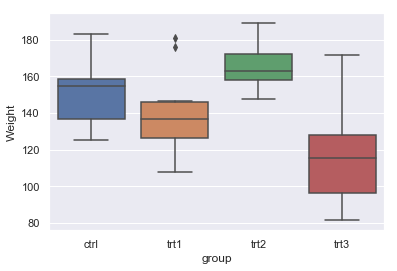

In [197]:
sns.set()
sns.boxplot(x='group',y='weight',data=body_wt)

# Label the axes
plt.xlabel('group')
plt.ylabel('Weight')

# Show the plot
plt.show()

- The people who have not undergone tratment have weights more clustered towards the part which is less than median 
- The range of weights is more for the values below median i.e., 81 - 145, but the weights which are above 145 have a very less range and the complete box is dragged towards the lower edge.
- After treatment 1 , there are 2 people who couldnt reduce the weights compared to other people who had undergone treatment 1. May be these are the people who are very much overweighted.
- So the treatment was successfull in reducng the weights very much compared to those who had not undergone treatment.
- While undergoing treatment 2, it has shown negative effect.
- Treatment 3 has performed very well since the weights have reduced very much

## ANOVA Test:

In [200]:
import statsmodels.api                as          sm
from   statsmodels.formula.api  import  ols

## Hypothesis:
- H(null): mean(ctrl) = mean(trt1) = mean(trt2) = mean(trt3)
- H(alternate): atleast one equality is violated   

In [202]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('weight ~ group',
                data=body_wt).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

             sum_sq    df          F   PR(>F)
group     13936.581   3.0  10.564679  0.00004
Residual  15830.010  36.0        NaN      NaN


## We reject the null hypothesis since p is less than 0.05. This means the groups are very different meaning the treatment deifinitely gives different results.

# Q5:

## Given:
- u(mean) = 10cm
- sd = 0.05cm

## z = (x-u) / sd

In [204]:
from   scipy.stats import norm
#norm.cdf(x)

## Ans(a): 

- z1 = (10-10) / 0.05 = 0
- Probability is 0.5

In [205]:
norm.cdf(0) #Ans: probability is 0.5

0.5

## Ans(b): 
-we need to find P(9 < x < 11)

- P(9<x<11) = P(11) - P(9) 
- z(for 9cm) = 9 -10 / 0.05 = -20
- z(for 11cm) = 11 - 10 / 0.05 = 20
- Probability is 1

In [207]:
norm.cdf(20) - norm.cdf(-20) #Ans: probability is 1

1.0